# Deep Learning Approach

## Imports

In [1]:
from sklearn.model_selection import train_test_split

from src.utils import load_config
from main import run_preprocessing_pipeline
from src.models import BinaryNeuralNetworkModel, MultilabelNeuralNetworkModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
config = load_config("deep-learning/dl-binary")

X, y = run_preprocessing_pipeline(config)
y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-12 00:02:44,395 - src.utils - INFO - Loading config from configs/deep-learning/dl-binary.yaml.
2025-03-12 00:02:44,400 - src.data_loader - INFO - Loading data with {'good_file': 'data/raw/good.csv', 'promo_file': 'data/raw/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-12 00:02:44,401 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-12 00:02:44,971 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-12 00:02:44,973 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-12 00:02:44,974 - src.preprocessing - INFO - Removing non-word characters.
2025-03-12 00:02:46,122 - src.preprocessing - INFO - Converting text to lowercase.
2025-03-12 00:02:46,14

In [3]:
model = BinaryNeuralNetworkModel(X_train.shape[1])

In [4]:
model.fit(X_train, y_train, 0.001, 5, 16)

Epoch 1/5, Loss: 0.2609
Epoch 2/5, Loss: 0.0465
Epoch 3/5, Loss: 0.0118
Epoch 4/5, Loss: 0.0037
Epoch 5/5, Loss: 0.0021


In [5]:
predictions = model.predict(X_test)

2025-03-12 00:03:53,253 - src.evaluation - INFO - Evaluating the model.
2025-03-12 00:03:53,356 - src.evaluation - INFO - Accuracy: 98.50%
2025-03-12 00:03:53,369 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       199
           1       0.99      0.98      0.98       201

    accuracy                           0.98       400
   macro avg       0.99      0.99      0.98       400
weighted avg       0.99      0.98      0.98       400

2025-03-12 00:03:53,372 - src.evaluation - INFO - Confusion Matrix:
[[197   2]
 [  4 197]]
2025-03-12 00:03:53,499 - src.evaluation - INFO - Evaluation finished.


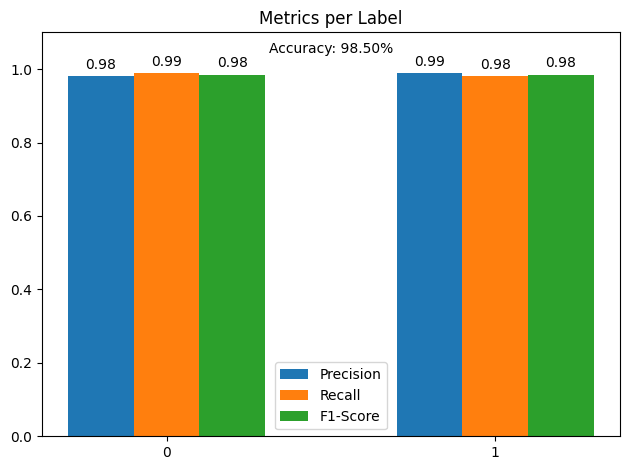

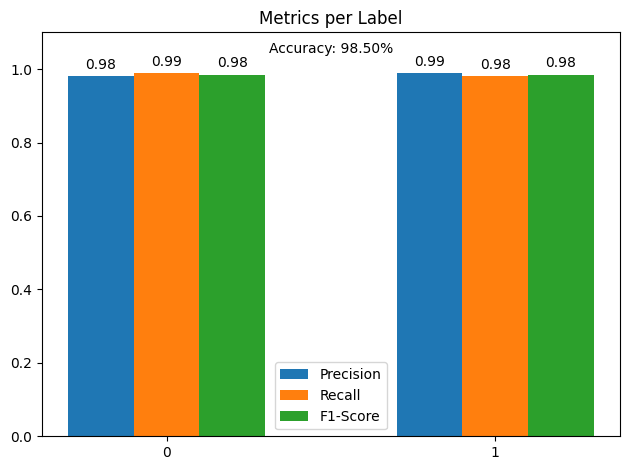

In [6]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [7]:
config = load_config("deep-learning/dl-multilabel")

X, y = run_preprocessing_pipeline(config)
columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-12 00:03:53,995 - src.utils - INFO - Loading config from configs/deep-learning/dl-multilabel.yaml.
2025-03-12 00:03:54,002 - src.data_loader - INFO - Loading data with {'good_file': 'data/raw/good.csv', 'promo_file': 'data/raw/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-12 00:03:54,003 - src.data_loader - INFO - Loading promotional data for multilabel classification.
2025-03-12 00:03:54,165 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-12 00:03:54,166 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-12 00:03:54,167 - src.preprocessing - INFO - Removing non-word characters.
2025-03-12 00:03:54,461 - src.preprocessing - INFO - Converting text to lowercase.
2025-03-12 00:03:54,468 - src.prep

In [8]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [9]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

Epoch 1/5, Loss: 0.4527
Epoch 2/5, Loss: 0.2849
Epoch 3/5, Loss: 0.2480
Epoch 4/5, Loss: 0.2103
Epoch 5/5, Loss: 0.1659


In [10]:
predictions = model.predict(X_test)

2025-03-12 00:04:19,166 - src.evaluation - INFO - Evaluating the model.
2025-03-12 00:04:19,222 - src.evaluation - INFO - Accuracy: 70.00%
2025-03-12 00:04:19,239 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       158
           1       0.00      0.00      0.00        18
           2       1.00      0.08      0.15        12
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        10

   micro avg       0.81      0.70      0.75       220
   macro avg       0.36      0.21      0.21       220
weighted avg       0.64      0.70      0.64       220
 samples avg       0.78      0.74      0.75       220

2025-03-12 00:04:19,244 - src.evaluation - INFO - Confusion Matrix:
[[[  6  36]
  [  4 154]]

 [[182   0]
  [ 18   0]]

 [[188   0]
  [ 11   1]]

 [[178   0]
  [ 22   0]]

 [[190   0]
  [ 10   0]]]
2025-03-12 00:04:19,373 - src.evaluation - INFO

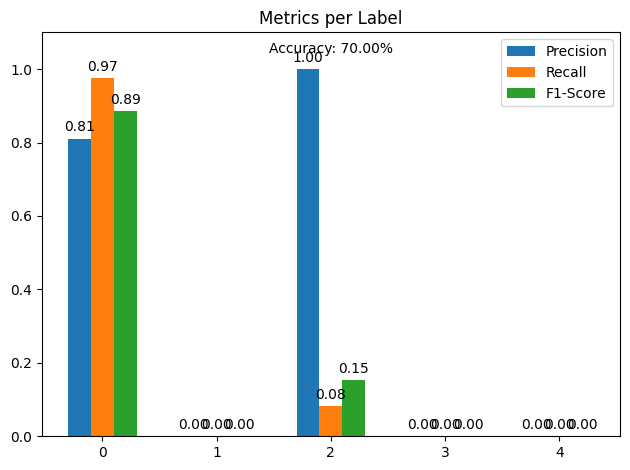

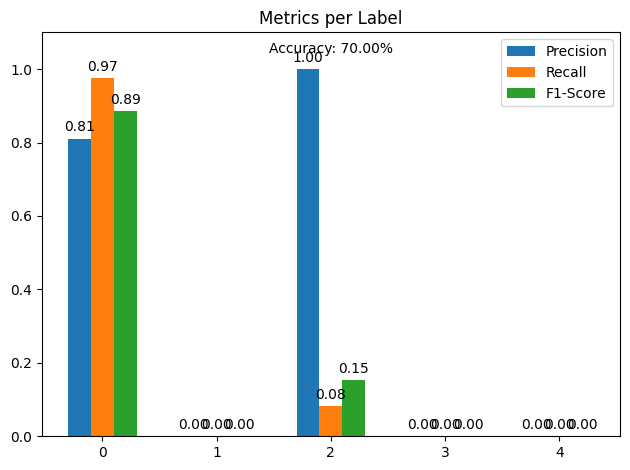

In [11]:
evaluate_model(model, X_test, y_test)

## Augmented Classification

In [12]:
config = load_config("deep-learning/dl-augmented")

X, y = run_preprocessing_pipeline(config)

columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-12 00:04:19,987 - src.utils - INFO - Loading config from configs/deep-learning/dl-augmented.yaml.
2025-03-12 00:04:19,999 - src.data_loader - INFO - Loading data with {'promo_file': 'data/raw/augmented_promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_augmented.csv'}
2025-03-12 00:04:19,999 - src.data_loader - INFO - Loading promotional data for multilabel classification.
2025-03-12 00:04:20,202 - src.utils - INFO - Data saved to data/intermediary/loaded_data_augmented.csv.
2025-03-12 00:04:20,203 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_augmented.csv'}
2025-03-12 00:04:20,205 - src.preprocessing - INFO - Removing non-word characters.
2025-03-12 00:04:20,468 - src.preprocessing - INFO - Converting text to lowercase.
2025-03-12 00:04:20,475 - src.preprocessing - INFO

In [13]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [14]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

Epoch 1/5, Loss: 0.4529
Epoch 2/5, Loss: 0.2863
Epoch 3/5, Loss: 0.2490
Epoch 4/5, Loss: 0.2037
Epoch 5/5, Loss: 0.1564


In [15]:
predictions = model.predict(X_test)

2025-03-12 00:04:46,169 - src.evaluation - INFO - Evaluating the model.
2025-03-12 00:04:46,235 - src.evaluation - INFO - Accuracy: 70.00%
2025-03-12 00:04:46,253 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       158
           1       0.00      0.00      0.00        18
           2       1.00      0.08      0.15        12
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        10

   micro avg       0.81      0.70      0.75       220
   macro avg       0.36      0.21      0.21       220
weighted avg       0.63      0.70      0.64       220
 samples avg       0.78      0.74      0.75       220

2025-03-12 00:04:46,263 - src.evaluation - INFO - Confusion Matrix:
[[[  5  37]
  [  4 154]]

 [[182   0]
  [ 18   0]]

 [[188   0]
  [ 11   1]]

 [[178   0]
  [ 22   0]]

 [[190   0]
  [ 10   0]]]
2025-03-12 00:04:46,433 - src.evaluation - INFO

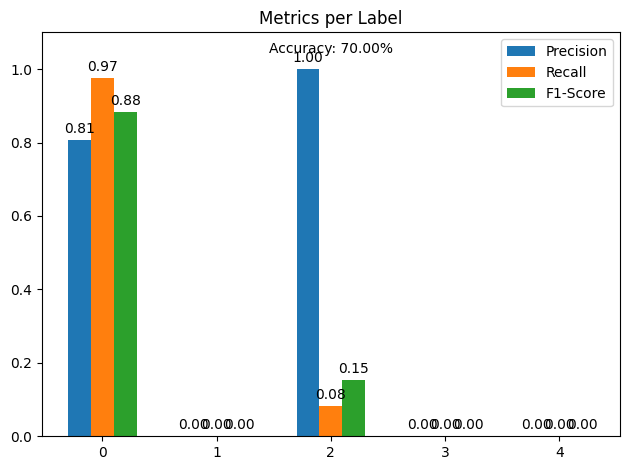

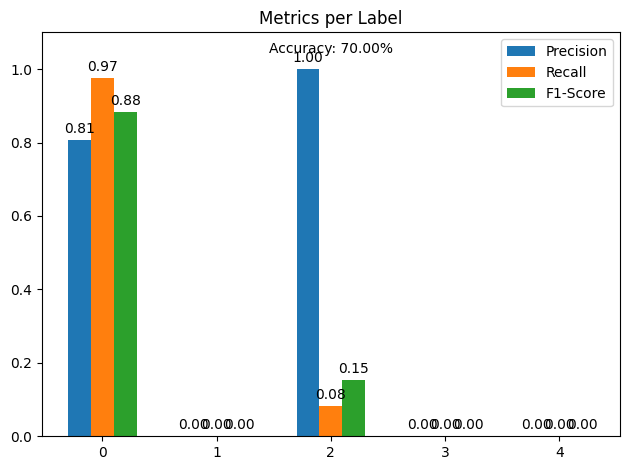

In [16]:
evaluate_model(model, X_test, y_test)